In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
#Importing Dataset
df = pd.read_csv('BreastCancer.csv')

In [3]:
#Inspecting columns and first 5 rows
print('first 5 rows')
display(df.head()) #last column is not needed (Unnamed:32). Hence, should be deleted in the df

first 5 rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Analyzing the df
df.info()
#There are two columns that are not needed: id and unnamed: 32
#Removing those columns
#Also, all columns are non-null which is good
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head() #df with only needed columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Diagnosis has value of either M (malignant) or B (benign)
print('Unique values of diagnosis:', df['diagnosis'].unique())
print('M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous')

Unique values of diagnosis: ['M' 'B']
M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous


In [7]:
#For consistency analysis, we will use 0 for B (benign) and 1 for M (malignant)
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#There is a significant difference between the count of 0 (benign) and 1 (malignant)
print(df['diagnosis'].value_counts())
print(" ")
print("We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows")

0    357
1    212
Name: diagnosis, dtype: int64
 
We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows


In [9]:
#Splitting the dataframe. We will drop some rows of df_zero to match the number of rows of df_one
df_one = df[df['diagnosis'] == 1]
print('df_one:', df_one.shape)
df_zero = df[df['diagnosis'] == 0]
print('df_zero:', df_zero.shape)

df_one: (212, 31)
df_zero: (357, 31)


In [10]:
#Dropping rows of df_zero by random
df_zero = df_zero.sample(len(df_one), axis = 0)
df_zero

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
397,0,12.800,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,...,13.740,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053
273,0,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175
452,0,12.000,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.019450,0.1615,...,13.090,37.88,85.07,523.7,0.12080,0.18560,0.18110,0.07116,0.2447,0.08194
377,0,13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,0.1421,...,14.690,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
518,0,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,...,15.050,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,...,11.260,24.39,73.07,390.2,0.13010,0.29500,0.34860,0.09910,0.2614,0.11620
221,0,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,...,14.980,17.13,101.10,686.6,0.13760,0.26980,0.25770,0.09090,0.3065,0.08177
371,0,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,...,16.200,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
307,0,9.000,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804


In [11]:
#Concatenate df_one and df_zero
df_final = pd.concat([df_zero, df_one])
df_final

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
397,0,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.19010,0.08296,0.1988,0.07053
273,0,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,...,10.75,20.88,68.09,355.2,0.14670,0.0937,0.04043,0.05159,0.2841,0.08175
452,0,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.18110,0.07116,0.2447,0.08194
377,0,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,...,14.69,35.63,97.11,680.6,0.11080,0.1457,0.07934,0.05781,0.2694,0.07061
518,0,12.880,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,...,15.05,24.37,99.31,674.7,0.14560,0.2961,0.12460,0.10960,0.2582,0.08893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.14070,0.4186,0.65990,0.25420,0.2929,0.09873
564,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.14100,0.2113,0.41070,0.22160,0.2060,0.07115
565,1,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.11660,0.1922,0.32150,0.16280,0.2572,0.06637
566,1,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.3094,0.34030,0.14180,0.2218,0.07820


<AxesSubplot:>

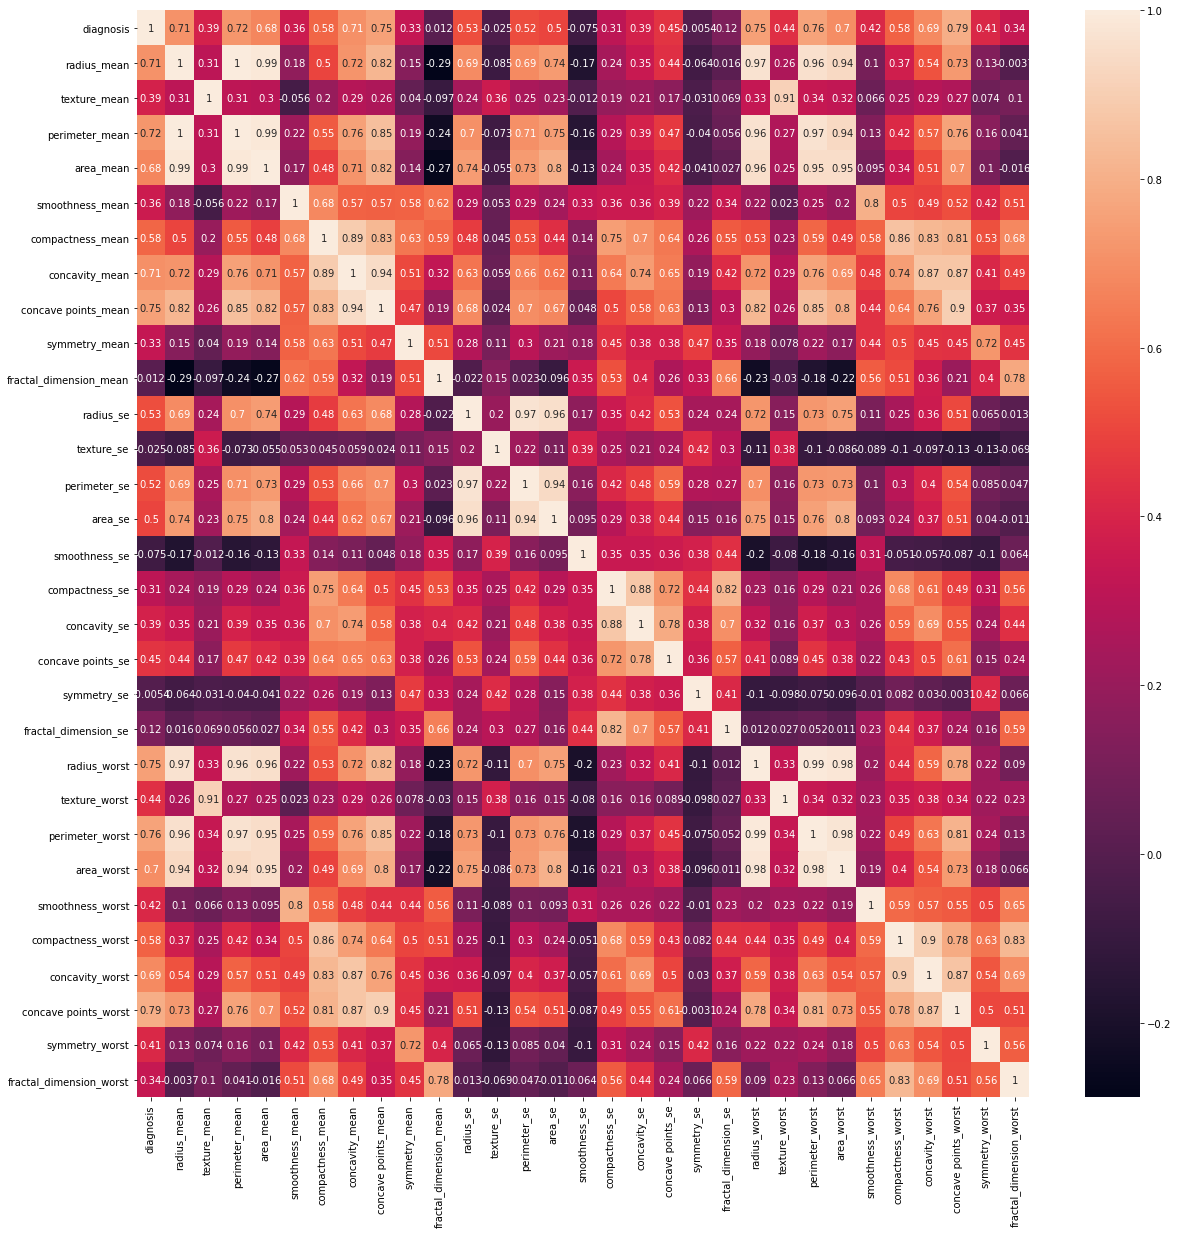

In [12]:
#Analyzing variables correlation
#There are variables that are highly correlated and there are not
#There are variables that are negatively and postively correlated
#Regarless, we will use all variables. We inspected correlation as we might need it if there are some issues with the result later
correlation = df_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)

In [13]:
#Setting response column to y 
#Setting predictor columns to x
y = 'diagnosis'
x = []
for i in df_final.columns:
    if i != y:
        x.append(i)
print('Here is the response column:', y)
print(' ')
print('Here are the predictors column:', x)

Here is the response column: diagnosis
 
Here are the predictors column: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [14]:
#df_x is the dataframe for predictor columns
df_x = df_final[x]
#df_y is the dataframe for response column
df_y = df_final[[y]]
display(df_x.head())
display(df_y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.19010,0.08296,0.1988,0.07053
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,10.75,20.88,68.09,355.2,0.14670,0.0937,0.04043,0.05159,0.2841,0.08175
452,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.18110,0.07116,0.2447,0.08194
377,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.11080,0.1457,0.07934,0.05781,0.2694,0.07061
518,12.880,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,15.05,24.37,99.31,674.7,0.14560,0.2961,0.12460,0.10960,0.2582,0.08893


,diagnosis
397,0
273,0
452,0
377,0
518,0


In [15]:
#Splitting the data into training set and test set
#70% to the training set and 30% to the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=60)
print('x_train dimension:', x_train.shape)
print('y_train dimension', y_train.shape)
print('x_test dimension', x_test.shape)
print('y_test dimension', y_test.shape)

x_train dimension: (296, 30)
y_train dimension (296, 1)
x_test dimension (128, 30)
y_test dimension (128, 1)


In [16]:
#The table below shows that there is a big variance on the mean and std. Example: smoothness and area
#We need to scale the data to elimate the said issue
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,14.903453,19.759730,97.406959,729.532432,0.098231,0.113852,0.103518,0.058002,0.183782,0.062521,...,17.400490,26.268108,115.135676,1007.622973,0.135310,0.278835,0.305065,0.128826,0.295566,0.084756
std,3.681093,4.254085,25.422619,380.328765,0.014188,0.055091,0.081624,0.040566,0.028459,0.006930,...,5.115545,6.154090,35.583348,626.225048,0.022928,0.167887,0.205523,0.066760,0.064814,0.018316
min,7.760000,10.380000,47.920000,181.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.964000,12.490000,57.260000,242.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055250
25%,12.210000,16.850000,78.522500,460.725000,0.087690,0.071855,0.036783,0.023750,0.164950,0.057150,...,13.367500,21.905000,87.375000,550.425000,0.119225,0.160100,0.143875,0.074035,0.251600,0.071777
50%,13.885000,19.580000,91.040000,597.700000,0.097735,0.106750,0.086575,0.052840,0.181150,0.061435,...,15.995000,25.920000,106.000000,785.800000,0.135800,0.235800,0.269450,0.125500,0.286950,0.080635
75%,17.547500,22.237500,115.025000,957.250000,0.107500,0.144350,0.152225,0.086260,0.199225,0.066270,...,20.670000,30.572500,138.450000,1323.750000,0.149550,0.361350,0.423825,0.182000,0.323925,0.093380
max,28.110000,31.120000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.218400,0.937900,1.170000,0.290300,0.663800,0.173000


In [17]:
#Fitting scaler to the train dataset
scaler = StandardScaler()
scaler.fit(x_train)

#Scaling train and test dataset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Logistic Regression Model**

In [18]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

/Users/maynardemmanuelmiranda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [33]:
#Training the model and predicting using the model
#Using the 
test_pred_logreg = logreg.predict(x_test_scaled)
test_pred_logreg

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [20]:
#Computing the accuracy of the model
logistic_regression_accuracy = accuracy_score(y_test, test_pred_logreg)
print('The Logistic Regression accuracy is:', round(logistic_regression_accuracy,2))

The Logistic Regression accuracy is: 0.96


Logistic Regression Confusion Matrix
Accuracy is 0.96


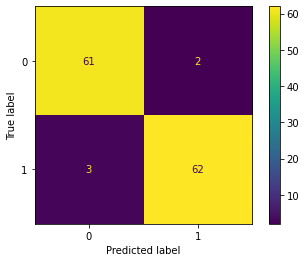

In [21]:
#Displaying the confusion Matrix
confusion_matrix(y_test, test_pred_logreg)
plot_confusion_matrix(logreg, x_test_scaled, y_test)
print('Logistic Regression Confusion Matrix')
print('Accuracy is', round(logistic_regression_accuracy,2))

**K Nearest Neighbors**

In [22]:
#KNN Model
#Setting the value of K
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_scaled, y_train)

<ipython-input-22-b45f3bfcd971>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [34]:
test_pred_knn = classifier.predict(x_test_scaled)
test_pred_knn

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [24]:
knn_accuracy = accuracy_score(y_test, test_pred_knn)
print('The K-Nearest Neighbors accuracy is:', round(knn_accuracy,2))

The K-Nearest Neighbors accuracy is: 0.92


K Nearest Neighbor Confusion Matrix
Accuracy is 0.92


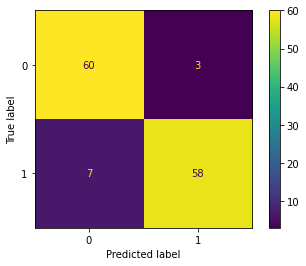

In [25]:
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('K Nearest Neighbor Confusion Matrix')
print('Accuracy is', round(knn_accuracy,2))

**Support Vector Machine**

In [26]:
#Generating SVM and setting parameters
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train_scaled, y_train)

/Users/maynardemmanuelmiranda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=2, gamma='auto', kernel='linear')

In [35]:
#Predicting using the SVM model
test_pred_svm=classifier.predict(x_test_scaled)
test_pred_svm

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [28]:
#Computing SVM Accuracy
svm_accuracy = accuracy_score(y_test, test_pred_svm)
print('The Support Vector Machine accuracy is:', round(svm_accuracy,2))

The Support Vector Machine accuracy is: 0.95


Support Vector Machine Confusion Matrix
Accuracy is 0.95


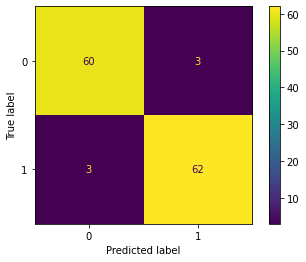

In [29]:
#Generating the SVM Confusion Matrix
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('Support Vector Machine Confusion Matrix')
print('Accuracy is', round(svm_accuracy,2))

**Summary of Results**

In [36]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]



array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [53]:
#Logistic Regression TN,FP,FN and TP
logreg_TN = confusion_matrix(y_test, test_pred_logreg)[0][0]
logreg_FP = confusion_matrix(y_test, test_pred_logreg)[0][1]
logreg_FN = confusion_matrix(y_test, test_pred_logreg)[1][0]
logreg_TP = confusion_matrix(y_test, test_pred_logreg)[1][1]

In [55]:
#K Nearest Neighbors TN,FP,FN and TP
knn_TN = confusion_matrix(y_test, test_pred_knn)[0][0]
knn_FP = confusion_matrix(y_test, test_pred_knn)[0][1]
knn_FN = confusion_matrix(y_test, test_pred_knn)[1][0]
knn_TP = confusion_matrix(y_test, test_pred_knn)[1][1]

In [56]:
#SVM TN, FP, FN, and TP
svm_TN = confusion_matrix(y_test, test_pred_svm)[0][0]
svm_FP = confusion_matrix(y_test, test_pred_svm)[0][1]
svm_FN = confusion_matrix(y_test, test_pred_svm)[1][0]
svm_TP = confusion_matrix(y_test, test_pred_svm)[1][1]

In [65]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]
true_negative = [logreg_TN, knn_TN, svm_TN]
false_positive = [logreg_FP, knn_FP, svm_FP]
false_negative = [logreg_FN, knn_FN, svm_FN]
true_positive = [logreg_TP, logreg_TP, svm_TP]

data = {'Model': models, 'Accuracy': accuracy, 'True Positive': true_positive, 'True Negative': true_negative, 
       'False Positive': false_positive, 'False Negative': false_negative}
result_df = pd.DataFrame(data)
display(result_df)

,Model,Accuracy,True Positive,True Negative,False Positive,False Negative
0,Logistic Regression,0.960938,62,61,2,3
1,K Nearest Neighbors,0.921875,62,60,3,3
2,Support Vector Machine,0.953125,62,60,3,3
